# K-Means Clustering in Python: A Practical Guide

[source](https://realpython.com/k-means-clustering-python/)

## Table of Contents

### Introduction

### What Is Clustering?
- Overview of Clustering Techniques
- Partitional Clustering
- Hierarchical Clustering
- Density-Based Clustering

### How to Perform K-Means Clustering in Python
- Understanding the K-Means Algorithm
- Writing Your First K-Means Clustering Code in Python
- Choosing the Appropriate Number of Clusters
- Evaluating Clustering Performance Using Advanced Techniques

###  How to Build a K-Means Clustering Pipeline in Python
- Building a K-Means Clustering Pipeline
- Tuning a K-Means Clustering Pipeline

### Conclusion

## Introduction

The k-means clustering method is an [unsupervised machine learning technique](https://en.wikipedia.org/wiki/Unsupervised_learning) used to identify clusters of data objects in a dataset. There are many different types of clustering methods, but k-means is one of the oldest and most approachable. These traits make implementing k-means clustering in Python reasonably straightforward, even for novice programmers and data scientists.

If you’re interested in learning how and when to implement k-means clustering in Python, then this is the right place. You’ll walk through an end-to-end example of k-means clustering using Python, from preprocessing the data to evaluating results.

In this tutorial, you’ll learn:
- What k-means clustering is
- When to use k-means clustering to analyze your data
- How to implement k-means clustering in Python with scikit-learn
- How to select a meaningful number of clusters

## What Is Clustering?
Clustering is a set of techniques used to partition data into groups, or clusters. Clusters are loosely defined as groups of data objects that are more similar to other objects in their cluster than they are to data objects in other clusters. In practice, clustering helps identify two qualities of data:

- Meaningfulness
- Usefulness

Meaningful clusters expand domain knowledge. For example, in the medical field, researchers applied clustering to gene expression experiments. The clustering results identified groups of patients who respond differently to medical treatments.

Useful clusters, on the other hand, serve as an intermediate step in a [data pipeline](https://en.wikipedia.org/wiki/Pipeline_(computing)). For example, businesses use clustering for customer segmentation. The clustering results segment customers into groups with similar purchase histories, which businesses can then use to create targeted advertising campaigns.

There are many other [applications of clustering](https://en.wikipedia.org/wiki/Cluster_analysis#Applications), such as document clustering and social network analysis. These applications are relevant in nearly every industry, making clustering a valuable skill for professionals working with data in any field.

### Overview of Clustering Techniques
You can perform clustering using many different approaches—so many, in fact, that there are entire categories of clustering algorithms. Each of these categories has its own unique strengths and weaknesses. This means that certain clustering algorithms will result in more natural cluster assignments depending on the input data.

Note: If you’re interested in learning about clustering algorithms not mentioned in this section, then check out [A Comprehensive Survey of Clustering Algorithms](https://link.springer.com/content/pdf/10.1007/s40745-015-0040-1.pdf) for an excellent review of popular techniques.

Selecting an appropriate clustering algorithm for your dataset is often difficult due to the number of choices available. Some important factors that affect this decision include the characteristics of the clusters, the features of the dataset, the number of outliers, and the number of data objects.

You’ll explore how these factors help determine which approach is most appropriate by looking at three popular categories of clustering algorithms:
- Partitional clustering
- Hierarchical clustering
- Density-based clustering

It’s worth reviewing these categories at a high level before jumping right into k-means. You’ll learn the strengths and weaknesses of each category to provide context for how k-means fits into the landscape of clustering algorithms.

### Partitional Clustering
Partitional clustering divides data objects into nonoverlapping groups. In other words, no object can be a member of more than one cluster, and every cluster must have at least one object.

These techniques require the user to specify the number of clusters, indicated by the variable k. Many partitional clustering algorithms work through an iterative process to assign subsets of data points into k clusters. Two examples of partitional clustering algorithms are k-means and k-medoids.

These algorithms are both nondeterministic, meaning they could produce different results from two separate runs even if the runs were based on the same input.

Partitional clustering methods have several strengths:
- They work well when clusters have a spherical shape.
- They’re scalable with respect to algorithm complexity.

They also have several weaknesses:
- They’re not well suited for clusters with complex shapes and different sizes.
- They break down when used with clusters of different densities.

### Hierarchical Clustering
Hierarchical clustering determines cluster assignments by building a hierarchy. This is implemented by either a bottom-up or a top-down approach:
- Agglomerative clustering is the bottom-up approach. It merges the two points that are the most similar until all points have been merged into a single cluster.
- Divisive clustering is the top-down approach. It starts with all points as one cluster and splits the least similar clusters at each step until only single data points remain.

These methods produce a tree-based hierarchy of points called a [dendrogram](https://en.wikipedia.org/wiki/Dendrogram). Similar to partitional clustering, in hierarchical clustering the number of clusters (k) is often predetermined by the user. Clusters are assigned by cutting the dendrogram at a specified depth that results in k groups of smaller dendrograms.

Unlike many partitional clustering techniques, hierarchical clustering is a deterministic process, meaning cluster assignments won’t change when you run an algorithm twice on the same input data.

The strengths of hierarchical clustering methods include the following:
- They often reveal the finer details about the relationships between data objects.
- They provide an interpretable dendrogram.

The weaknesses of hierarchical clustering methods include the following:
- They’re computationally expensive with respect to algorithm complexity.
- They’re sensitive to [noise](https://en.wikipedia.org/wiki/Noisy_data) and [outliers](https://en.wikipedia.org/wiki/Outlier).

### Density-Based Clustering
Density-based clustering determines cluster assignments based on the density of data points in a region. Clusters are assigned where there are high densities of data points separated by low-density regions.

Unlike the other clustering categories, this approach doesn’t require the user to specify the number of clusters. Instead, there is a distance-based parameter that acts as a tunable threshold. This threshold determines how close points must be to be considered a cluster member.

Examples of density-based clustering algorithms include Density-Based Spatial Clustering of Applications with Noise, or [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html), and Ordering Points To Identify the Clustering Structure, or [OPTICS](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html#sklearn.cluster.OPTICS).

The strengths of density-based clustering methods include the following:
- They excel at identifying clusters of nonspherical shapes.
- They’re resistant to outliers.

The weaknesses of density-based clustering methods include the following:
- They aren’t well suited for [clustering in high-dimensional spaces](https://en.wikipedia.org/wiki/Clustering_high-dimensional_data).
- They have trouble identifying clusters of varying densities.


## How to Perform K-Means Clustering in Python
In this section, you’ll take a step-by-step tour of the conventional version of the k-means algorithm. Understanding the details of the algorithm is a fundamental step in the process of writing your k-means clustering pipeline in Python. What you learn in this section will help you decide if k-means is the right choice to solve your clustering problem.

### Understanding the K-Means Algorithm
Conventional k-means requires only a few steps. The first step is to randomly select k centroids, where k is equal to the number of clusters you choose. Centroids are data points representing the center of a cluster.

The main element of the algorithm works by a two-step process called expectation-maximization. The expectation step assigns each data point to its nearest centroid. Then, the maximization step computes the mean of all the points for each cluster and sets the new centroid. Here’s what the conventional version of the k-means algorithm looks like:


| Algorithm k-means algorithm                                          |
|----------------------------------------------------------------------|
| 1: Specify the number k of clusters to assign.                       |
| 2: Randomly initialize k centroids.                                  |
| 3: **repeat**                                                            |
| 4:    &nbsp; &nbsp; &nbsp;**expectation**: Assign each point to its closest centroid.        |
| 5:    &nbsp; &nbsp; &nbsp;**maximization**: Compute the new centroid (mean) of each cluster. |
| 6: **until** The centroid positions do not change.                       |

The quality of the cluster assignments is determined by computing the [sum of the squared error (SSE)](https://en.wikipedia.org/wiki/Residual_sum_of_squares) after the centroids converge, or match the previous iteration’s assignment. The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.

The figure below shows the centroids and SSE updating through the first five iterations from two different runs of the k-means algorithm on the same dataset:
![centroids iterations](centroids_iterations.gif)

The purpose of this figure is to show that the initialization of the centroids is an important step. It also highlights the use of SSE as a measure of clustering performance. After choosing a number of clusters and the initial centroids, the expectation-maximization step is repeated until the centroid positions reach convergence and are unchanged.

The random initialization step causes the k-means algorithm to be nondeterministic, meaning that cluster assignments will vary if you run the same algorithm twice on the same dataset. Researchers commonly run several initializations of the entire k-means algorithm and choose the cluster assignments from the initialization with the lowest SSE.

### Writing Your First K-Means Clustering Code in Python

Thankfully, there’s a robust implementation of k-means clustering in Python from the popular machine learning package [scikit-learn](https://scikit-learn.org/stable/). You’ll learn how to write a practical implementation of the k-means algorithm using the [scikit-learn version of the algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).

Note: If you’re interested in gaining a deeper understanding of how to write your own k-means algorithm in Python, then check out the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html).

You can begin by installing the required packages:

In [1]:
! pip install --upgrade pip

In [3]:
!pip install matplotlib numpy pandas seaborn scikit-learn kneed

This step will import the modules needed for all the code in this section:

In [4]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

You can generate the data from the above GIF using make_blobs(), a convenience function in scikit-learn used to generate synthetic clusters. make_blobs() uses these parameters:
- n_samples is the total number of samples to generate.
- centers is the number of centers to generate.
- cluster_std is the standard deviation.

make_blobs() returns a tuple of two values:
- A two-dimensional NumPy array with the x- and y-values for each of the samples
- A one-dimensional NumPy array containing the cluster labels for each sample

Generate the synthetic data and labels:

In [5]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

Nondeterministic machine learning algorithms like k-means are difficult to reproduce. The random_state parameter is set to an integer value so you can follow the data presented in the tutorial. In practice, it’s best to leave random_state as the default value, None.

Here’s a look at the first five elements for each of the variables returned by make_blobs():

In [7]:
features.shape

(200, 2)

In [8]:
type(features)

numpy.ndarray

In [9]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [10]:
true_labels.shape

(200,)

In [11]:
type(true_labels)

numpy.ndarray

In [12]:
true_labels[:5]

array([1, 0, 2, 2, 2])

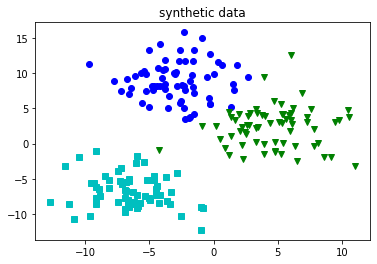

In [37]:
# create new plot with the synthetic data and labels
plt.plot()
colors = ['b', 'g', 'c']
markers = ['o', 'v', 's']
plt.title('synthetic data')

for i, l in enumerate(true_labels):
    plt.plot(features[i, 0], features[i, 1], color=colors[l], marker=markers[l],ls='None')

plt.show()

Data sets usually contain numerical features that have been measured in different units, such as height (in inches) and weight (in pounds). A machine learning algorithm would consider weight more important than height only because the values for weight are larger and have higher variability from person to person.

Machine learning algorithms need to consider all features on an even playing field. That means the values for all features must be transformed to the same scale.

The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.

There are several approaches to implementing feature scaling. A great way to determine which technique is appropriate for your dataset is to read [scikit-learn’s preprocessing documentation](https://scikit-learn.org/stable/modules/preprocessing.html).

In this example, you’ll use the StandardScaler class. This class implements a type of feature scaling called standardization. Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1:

In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Take a look at how the values have been scaled in scaled_features:

In [14]:
scaled_features.shape

(200, 2)

In [15]:
type(scaled_features)

numpy.ndarray

In [16]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

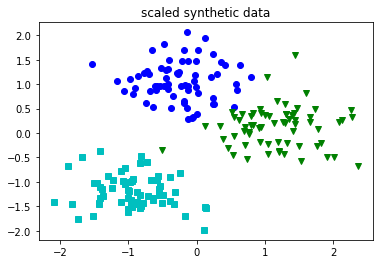

In [38]:
# create new plot with the scaled synthetic data and labels
plt.plot()
colors = ['b', 'g', 'c']
markers = ['o', 'v', 's']
plt.title('scaled synthetic data')

for i, l in enumerate(true_labels):
    plt.plot(scaled_features[i, 0], scaled_features[i, 1], color=colors[l], marker=markers[l],ls='None')

plt.show()

Now the data are ready to be clustered. The KMeans estimator class in scikit-learn is where you set the algorithm parameters before fitting the estimator to the data. The scikit-learn implementation is flexible, providing several parameters that can be tuned.

Here are the parameters used in this example:
- **init** controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence, which you’ll use later.
- **n_clusters** sets k for the clustering step. This is the most important parameter for k-means.
- **n_init** sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.
- **max_iter** sets the number of maximum iterations for each initialization of the k-means algorithm.

Instantiate the KMeans class with the following arguments:

In [23]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

The parameter names match the language that was used to describe the k-means algorithm earlier in the tutorial. Now that the k-means class is ready, the next step is to fit it to the data in scaled_features. This will perform ten runs of the k-means algorithm on your data with a maximum of 300 iterations per run:

In [24]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

Statistics from the initialization run with the lowest SSE are available as attributes of kmeans after calling .fit():

In [25]:
# The lowest SSE value
kmeans.inertia_


74.57960106819854

In [26]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [27]:
# The number of iterations required to converge
kmeans.n_iter_

2

Finally, the cluster assignments are stored as a one-dimensional NumPy array in kmeans.labels_. Here’s a look at the first five predicted labels:

In [28]:
kmeans.labels_[:5]

array([2, 0, 1, 1, 1], dtype=int32)

In [29]:
true_labels[:5]

array([1, 0, 2, 2, 2])

Note that the order of the cluster labels may be flipped. 

This behavior is normal, as the ordering of cluster labels is dependent on the initialization. Cluster 0 from the first run could be labeled cluster 1 in the second run and vice versa. This doesn’t affect clustering evaluation metrics.

In [31]:
type(kmeans.cluster_centers_)

numpy.ndarray

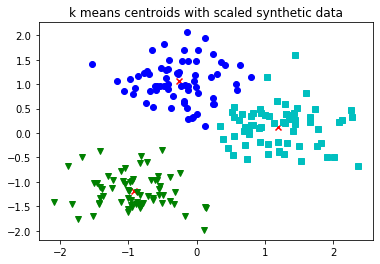

In [39]:
# create new plot with model output
plt.plot()
colors = ['b', 'g', 'c']
markers = ['o', 'v', 's']
plt.title('k means centroids with scaled synthetic data')

for i, l in enumerate(kmeans.labels_):
    plt.plot(scaled_features[i, 0], scaled_features[i, 1], color=colors[l], marker=markers[l],ls='None')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="x", color='r')
plt.show()

### Choosing the Appropriate Number of Clusters
In this section, you’ll look at two methods that are commonly used to evaluate the appropriate number of clusters:
- The elbow method
- The silhouette coefficient

These are often used as complementary evaluation techniques rather than one being preferred over the other. 

#### elbow method
To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:

In [40]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

The previous code block made use of Python’s dictionary unpacking operator (**). To learn more about this powerful Python operator, check out [How to Iterate Through a Dictionary in Python](https://realpython.com/iterate-through-dictionary-python/#using-the-dictionary-unpacking-operator).

When you plot SSE as a function of the number of clusters, notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.

There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. In this example, the elbow is located at x=3:

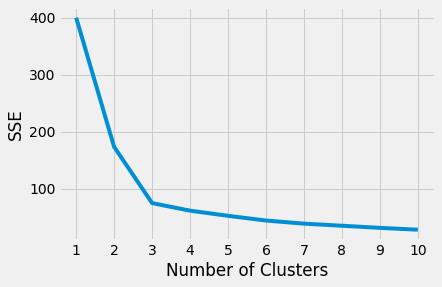

In [43]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Determining the elbow point in the SSE curve isn’t always straightforward. If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, [kneed](https://github.com/arvkevi/kneed), to identify the elbow point programmatically:

In [44]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

#### silhouette coefficient 

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:
- How close the data point is to other points in the cluster
- How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In the [scikit-learn implementation of the silhouette coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html), the average silhouette coefficient of all the samples is summarized into one score. The silhouette score() function needs a minimum of two clusters, or it will raise an exception.

Loop through values of k again. This time, instead of computing SSE, compute the silhouette coefficient:

In [45]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

Plotting the average silhouette scores for each k shows that the best choice for k is 3 since it has the maximum score:

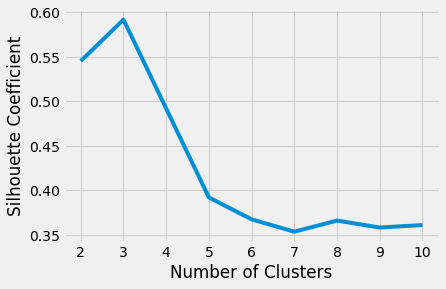

In [48]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

To identify the best choice programmatically:

In [51]:
silhouette_coefficients.index(max(silhouette_coefficients)) + 2

3

Ultimately, your decision on the number of clusters to use should be guided by a combination of domain knowledge and clustering evaluation metrics.

### Evaluating Clustering Performance Using Advanced Techniques
The elbow method and silhouette coefficient evaluate clustering performance without the use of ground truth labels. Ground truth labels categorize data points into groups based on assignment by a human or an existing algorithm. These types of metrics do their best to suggest the correct number of clusters but can be deceiving when used without context.

Note: In practice, it’s rare to encounter datasets that have ground truth labels.

When comparing k-means against a density-based approach on nonspherical clusters, the results from the elbow method and silhouette coefficient rarely match human intuition. This scenario highlights why advanced clustering evaluation techniques are necessary. To visualize an example, import these additional modules:

In [52]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

This time, use make_moons() to generate synthetic data in the shape of crescents:

In [53]:
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(features)

Fit both a k-means and a DBSCAN algorithm to the new data and visually assess the performance by plotting the cluster assignments with Matplotlib:

In [54]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round (2)

Print the silhouette coefficient for each of the two algorithms and compare them. A higher silhouette coefficient suggests better clusters, which is misleading in this scenario:

In [56]:
kmeans_silhouette , dbscan_silhouette

(0.5, 0.38)

The silhouette coefficient is higher for the k-means algorithm. 

Here’s how you can plot the comparison of the two algorithms in the crescent moons example:

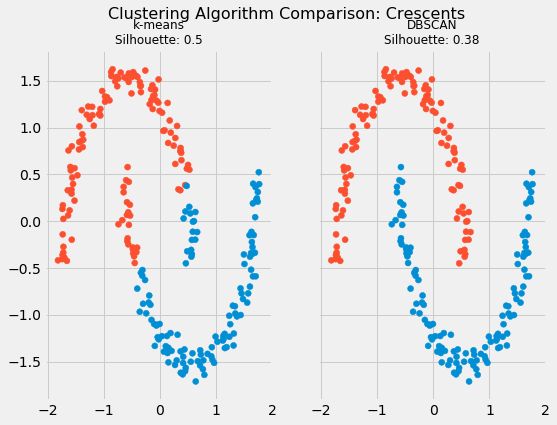

In [57]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title( f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12} )

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title( f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12} )
plt.show()

The DBSCAN algorithm appears to find more natural clusters according to the shape of the data.

This suggests that you need a better method to compare the performance of these two clustering algorithms.

To learn more about plotting with Matplotlib and Python, check out [Python Plotting with Matplotlib (Guide)](https://realpython.com/python-matplotlib-guide/). 


Since the ground truth labels are known, it’s possible to use a clustering metric that considers labels in its evaluation. You can use the [scikit-learn implementation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score) of a common metric called the adjusted rand index (ARI). Unlike the silhouette coefficient, the ARI uses true cluster assignments to measure the similarity between true and predicted labels.

Compare the clustering results of DBSCAN and k-means using ARI as the performance metric:

In [58]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

round(ari_kmeans, 2) , round(ari_dbscan, 2)

(0.46, 1.0)

The ARI output values range between -1 and 1. A score close to 0.0 indicates random assignments, and a score close to 1 indicates perfectly labeled clusters.

Based on the above output, you can see that the silhouette coefficient was misleading. ARI shows that DBSCAN is the best choice for the synthetic crescents example as compared to k-means.

There are several metrics that evaluate the quality of clustering algorithms. Reading through the [implementations in scikit-learn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics) will help you select an appropriate clustering evaluation metric.

## How to Build a K-Means Clustering Pipeline in Python
Now that you have a basic understanding of k-means clustering in Python, it’s time to perform k-means clustering on a real-world dataset. These data contain gene expression values from a manuscript authored by [The Cancer Genome Atlas (TCGA)](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga) Pan-Cancer analysis project investigators.

There are 881 samples (rows) representing five distinct cancer subtypes. Each sample has gene expression values for 20,531 genes (columns). The [dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00401/TCGA-PANCAN-HiSeq-801x20531.tar.gz) is available from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php), but you can use the Python code below to obtain the data programmatically.


In this section, you’ll build a robust k-means clustering pipeline. Since you’ll perform multiple transformations of the original input data, your pipeline will also serve as a practical clustering framework.

### Building a K-Means Clustering Pipeline
Assuming you want to start with a fresh namespace, import all the modules needed to build and evaluate the pipeline, including pandas and seaborn for more advanced visualizations:

In [1]:
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

Download and extract the TCGA dataset from UCI:

In [60]:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

# Build the url
full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

# Download the file
r = urllib.request.urlretrieve (full_download_url, archive_name)

# Extract the data from the archive
tar = tarfile.open(archive_name, "r:gz")
tar.extractall()
tar.close()

After the download and extraction is completed, you should have a directory that looks like this:

TCGA-PANCAN-HiSeq-801x20531/

|

├── data.csv

└── labels.csv

The KMeans class in scikit-learn requires a NumPy array as an argument. The NumPy package has a helper function to load the data from the text file into memory as NumPy arrays:

In [2]:
datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"

data = np.genfromtxt(
    datafile,
    delimiter=",",
    usecols=range(1, 20532),
    skip_header=1
)

true_label_names = np.genfromtxt(
    labels_file,
    delimiter=",",
    usecols=(1,),
    skip_header=1,
    dtype="str"
)

Check out the first three columns of data for the first five samples as well as the labels for the first five samples:

In [3]:
data[:5, :3]

array([[0.        , 2.01720929, 3.26552691],
       [0.        , 0.59273209, 1.58842082],
       [0.        , 3.51175898, 4.32719872],
       [0.        , 3.66361787, 4.50764878],
       [0.        , 2.65574107, 2.82154696]])

In [4]:
data.shape

(801, 20531)

In [5]:
true_label_names[:5]

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA'], dtype='<U4')

In [6]:
true_label_names.shape

(801,)

The data variable contains all the gene expression values from 20,531 genes. The true_label_names are the cancer types for each of the 881 samples. The first record in data corresponds with the first label in true_labels.

The labels are strings containing abbreviations of cancer types:
- BRCA: Breast invasive carcinoma
- COAD: Colon adenocarcinoma
- KIRC: Kidney renal clear cell carcinoma
- LUAD: Lung adenocarcinoma
- PRAD: Prostate adenocarcinoma

To use these labels in the evaluation methods, you first need to convert the abbreviations to integers with LabelEncoder:

In [7]:
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(true_label_names)

true_labels[:5]

array([4, 3, 4, 4, 0])

Since the label_encoder has been fitted to the data, you can see the unique classes represented using .classes_. Store the length of the array to the variable n_clusters for later use:

In [8]:
label_encoder.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

In [9]:
n_clusters = len(label_encoder.classes_)

In [10]:
n_clusters

5

In practical machine learning pipelines, it’s common for the data to undergo multiple sequences of transformations before it feeds into a clustering algorithm. You learned about the importance of one of these transformation steps, feature scaling, earlier in this tutorial. An equally important data transformation technique is dimensionality reduction, which reduces the number of features in the dataset by either removing or combining them.

Dimensionality reduction techniques help to address a problem with machine learning algorithms known as [the curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). In short, as the number of features increases, the feature space becomes sparse. This sparsity makes it difficult for algorithms to find data objects near one another in higher-dimensional space. Since the gene expression dataset has over 20,000 features, it qualifies as a great candidate for dimensionality reduction.

Principal Component Analysis (PCA) is one of many dimensionality reduction techniques. PCA transforms the input data by projecting it into a lower number of dimensions called components. The components capture the variability of the input data through a linear combination of the input data’s features.

Note: A full description of PCA is out of scope for this tutorial, but you can learn more about it in the [scikit-learn user guide](https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca).

The next code block introduces you to the concept of [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html#pipeline). The scikit-learn Pipeline class is a concrete implementation of the abstract idea of a machine learning pipeline.

Your gene expression data aren’t in the optimal format for the KMeans class, so you’ll need to build a preprocessing pipeline. The pipeline will implement an alternative to the StandardScaler class called MinMaxScaler for feature scaling. You use MinMaxScaler when you do not assume that the shape of all your features follows a normal distribution.

The next step in your preprocessing pipeline will implement the [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to perform dimensionality reduction:

In [11]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

Now that you’ve built a pipeline to process the data, you’ll build a separate pipeline to perform k-means clustering. You’ll override the following default arguments of the KMeans class:
- init: You’ll use "k-means++" instead of "random" to ensure centroids are initialized with some distance between them. In most cases, this will be an improvement over "random".
- n_init: You’ll increase the number of initializations to ensure you find a stable solution.
- max_iter: You’ll increase the number of iterations per initialization to ensure that k-means will converge.

Build the k-means clustering pipeline with user-defined arguments in the KMeans constructor:

In [12]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

The Pipeline class can be chained to form a larger pipeline. Build an end-to-end k-means clustering pipeline by passing the "preprocessor" and "clusterer" pipelines to Pipeline:

In [13]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

Calling .fit() with data as the argument performs all the pipeline steps on the data:

In [14]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

The pipeline performs all the necessary steps to execute k-means clustering on the gene expression data! Depending on your Python REPL, .fit() may print a summary of the pipeline. Objects defined inside pipelines are accessible using their step name.

Evaluate the performance by calculating the silhouette coefficient:

In [15]:
preprocessed_data = pipe["preprocessor"].transform(data)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.5118775528450284

Calculate ARI, too, since the ground truth cluster labels are available:

In [16]:
adjusted_rand_score(true_labels, predicted_labels)

0.722276752060253

As mentioned earlier, the scale for each of these clustering performance metrics ranges from -1 to 1. A silhouette coefficient of 0 indicates that clusters are significantly overlapping one another, and a silhouette coefficient of 1 indicates clusters are well-separated. An ARI score of 0 indicates that cluster labels are randomly assigned, and an ARI score of 1 means that the true labels and predicted labels form identical clusters.

Since you specified n_components=2 in the PCA step of the k-means clustering pipeline, you can also visualize the data in the context of the true labels and predicted labels. Plot the results using a pandas DataFrame and the seaborn plotting library:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


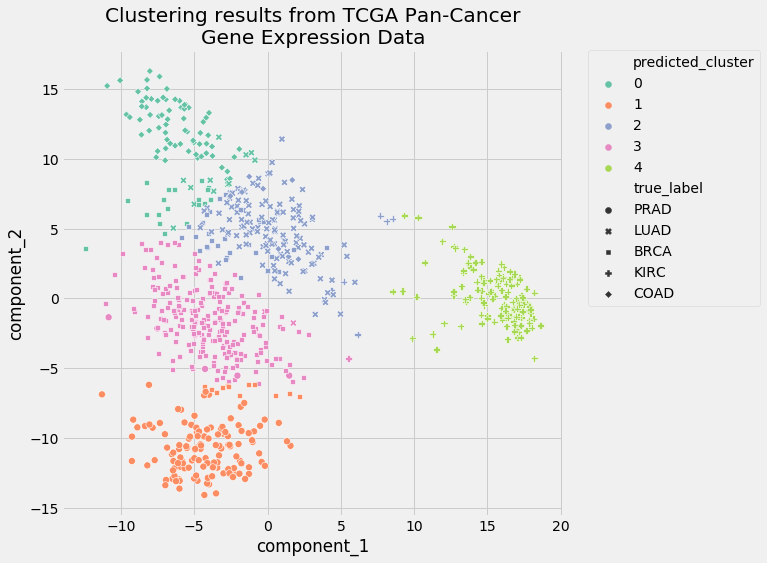

In [17]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results from TCGA Pan-Cancer\nGene Expression Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

The visual representation of the clusters confirms the results of the two clustering evaluation metrics. The performance of your pipeline was pretty good. The clusters only slightly overlapped, and cluster assignments were much better than random.

### Tuning a K-Means Clustering Pipeline
Your first k-means clustering pipeline performed well, but there’s still room to improve. That’s why you went through the trouble of building the pipeline: you can tune the parameters to get the most desirable clustering results.

The process of parameter tuning consists of sequentially altering one of the input values of the algorithm’s parameters and recording the results. At the end of the parameter tuning process, you’ll have a set of performance scores, one for each new value of a given parameter. Parameter tuning is a powerful method to maximize performance from your clustering pipeline.

By setting the PCA parameter n_components=2, you squished all the features into two components, or dimensions. This value was convenient for visualization on a two-dimensional plot. But using only two components means that the PCA step won’t capture all of the explained variance of the input data.

Explained variance measures the discrepancy between the PCA-transformed data and the actual input data. The [relationship between n_components and explained variance](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html#Choosing-the-number-of-components) can be visualized in a plot to show you how many components you need in your PCA to capture a certain percentage of the variance in the input data. You can also use clustering performance metrics to evaluate how many components are necessary to achieve satisfactory clustering results.

In this example, you’ll use clustering performance metrics to identify the appropriate number of components in the PCA step. The Pipeline class is powerful in this situation. It allows you to perform basic parameter tuning using a for loop.

Iterate over a range of n_components and record evaluation metrics for each iteration:

In [18]:
# Empty lists to hold evaluation metrics
silhouette_scores = []
ari_scores = []
for n in range(2, 11):
    # This set the number of components for pca,
    # but leaves other steps unchanged
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(data)

    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(data),
        pipe["clusterer"]["kmeans"].labels_,
    )
    ari = adjusted_rand_score(
        true_labels,
        pipe["clusterer"]["kmeans"].labels_,
    )

    # Add metrics to their lists
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

Plot the evaluation metrics as a function of n_components to visualize the relationship between adding components and the performance of the k-means clustering results:

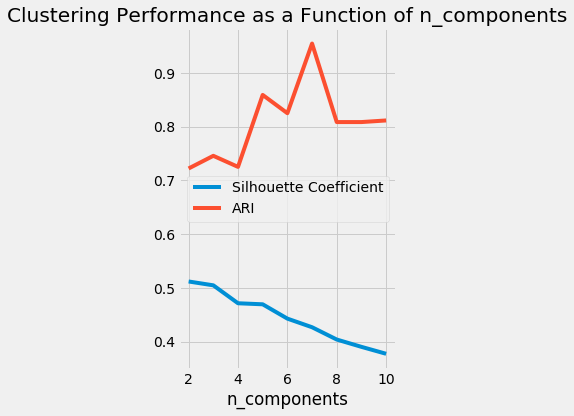

In [19]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 11),
    silhouette_scores,
    c="#008fd5",
    label="Silhouette Coefficient",
)
plt.plot(range(2, 11), ari_scores, c="#fc4f30", label="ARI")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()

There are two takeaways from this figure:
- The silhouette coefficient decreases linearly. The silhouette coefficient depends on the distance between points, so as the number of dimensions increases, the sparsity increases.
- The ARI improves significantly as you add components. It appears to start tapering off after n_components=7, so that would be the value to use for presenting the best clustering results from this pipeline.

Like most machine learning decisions, you must balance optimizing clustering evaluation metrics with the goal of the clustering task. In situations when cluster labels are available, as is the case with the cancer dataset used in this tutorial, ARI is a reasonable choice. ARI quantifies how accurately your pipeline was able to reassign the cluster labels.

The silhouette coefficient, on the other hand, is a good choice for exploratory clustering because it helps to identify subclusters. These subclusters warrant additional investigation, which can lead to new and important insights.

## Conclusion
You now know how to perform k-means clustering in Python. Your final k-means clustering pipeline was able to cluster patients with different cancer types using real-world gene expression data. You can use the techniques you learned here to cluster your own data, understand how to get the best clustering results, and share insights with others.

In this tutorial, you learned:
- What the popular clustering techniques are and when to use them
- What the k-means algorithm is
- How to implement k-means clustering in Python
- How to evaluate the performance of clustering algorithms
- How to build and tune a robust k-means clustering pipeline in Python
- How to analyze and present clustering results from the k-means algorithm

You also took a whirlwind tour of scikit-learn, an accessible and extensible tool for implementing k-means clustering in Python.

You’re now ready to perform k-means clustering on datasets you find interesting. 

Note: The dataset used in this tutorial was obtained from the UCI Machine Learning Repository. Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.

The [original dataset](https://synapse.org/#!Synapse:syn4301332) is maintained by The Cancer Genome Atlas Pan-Cancer analysis project.

## Q & A

**Question**: On the first example, "Plotting the average silhouette scores for each k shows that the best choice for k is 3 since it has the maximum score", the silhouette coefficient clearly peaks at 3. On the last example, "The above code generates the a plot showing performance metrics as a function of n_components", ARI peaks at 7 (the best choice) but in this case the silhouette coefficient peaks at 2. In this last graph how should we interpret/explain or even, should we use the silhouette coefficient?

**Answer**: The ARI is the best choice in the last example since you have the original labels to evaluate performance. The silhouette coefficient is decreasing likely because the dimensionality is increasing (n_components), meaning the points are getting farther away from one another. Distance between data points affects the calculation of the silhouette coefficient. The silhouette coefficient would be more instructive when tuning parameters of a clustering pipeline that do not affect the dimensionality of the data, like k, for example.